In [ ]:

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df2 = pd.read_csv(io.BytesIO(uploaded['nyc_data.csv']))

Saving nyc_data.csv to nyc_data (1).csv


In [ ]:
xd=df2[df2.columns[1:10]]
yd=df2[df2.columns[10:11]]


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
xlr = xd.to_numpy()
ylr = yd.to_numpy()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(xd, yd, test_size=0.25, random_state=42)


In [ ]:
regr = linear_model.LinearRegression()


In [ ]:
regr.fit(xtrain, ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred = regr.predict(xtest)

In [ ]:
np.sqrt(mean_squared_error(ytest, ypred))


6.671306203456426e-10

In [ ]:
coef_dict = {}
for name, coef in zip(xd.columns, regr.coef_):
    coef_dict[name] = coef
    print(name, coef)

ADMIN_DOSE1_DAILY [-5.00000000e-01  1.02695630e-15  5.00000000e-01  7.70217223e-16
  5.00000000e-01  9.02923569e-16  5.00000000e-01 -3.05745013e-16
 -1.09634524e-15]


In [ ]:
regr.intercept_



array([9.13132681e-10])

In [ ]:
import matplotlib.dates as dates
new_x = dates.datestr2num(df2["DATE"])

ypreddf=pd.DataFrame(data=ypred)
new_y=ytrain.append(ypreddf)
new_y2=ytrain.append(ytest)

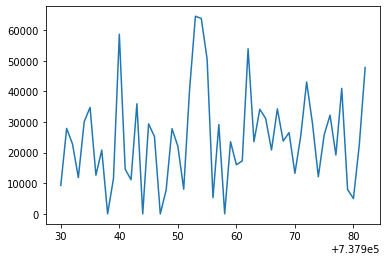

In [ ]:
import matplotlib.pyplot as plt

plt.plot(new_x[157:211],ytest)

#plt.scatter(xd['ADMIN_DOSE1_DAILY'], yd)
#plt.plot(xd['ADMIN_DOSE1_DAILY'], coef_dict['ADMIN_DOSE1_DAILY']* xd['ADMIN_DOSE1_DAILY'] + regr.intercept_, color='red')